In [1]:
import torch as t
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"\nTraining samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


Training samples: 60000
Test samples: 10000


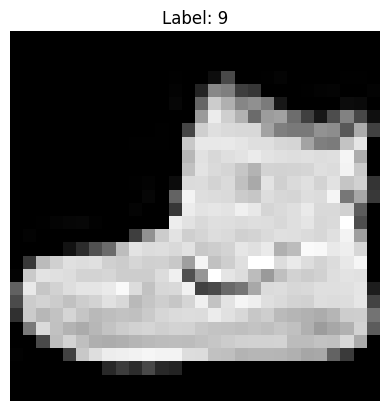

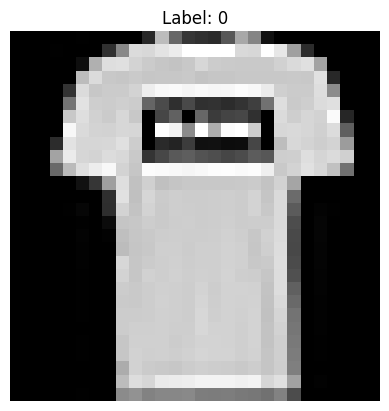

In [2]:
import matplotlib.pyplot as plt

image, label = train_dataset[0]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

image2, label2 = train_dataset[1]

plt.imshow(image2.squeeze(), cmap='gray')
plt.title(f"Label: {label2}")
plt.axis('off')
plt.show()

In [3]:
import torch.nn as nn

class Fashion_MLP(nn.Module):
    def __init__(self):
        super(Fashion_MLP, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.final = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

model = Fashion_MLP()
print(model)

Fashion_MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (final): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [4]:
cross_entr_l = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = cross_entr_l(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10] Loss: 0.4937
Epoch [2/10] Loss: 0.3680
Epoch [3/10] Loss: 0.3306
Epoch [4/10] Loss: 0.3065
Epoch [5/10] Loss: 0.2856
Epoch [6/10] Loss: 0.2734
Epoch [7/10] Loss: 0.2563
Epoch [8/10] Loss: 0.2427
Epoch [9/10] Loss: 0.2325
Epoch [10/10] Loss: 0.2213


In [5]:
correct = 0
total = 0

with t.no_grad():
    for data in test_loader:
        x, y = data
        output = model(x)
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(f'Accuracy: {round(correct/total, 3)*100}%')

Accuracy: 88.7%


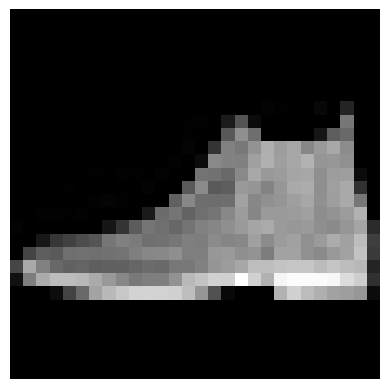

Predicted: 9 True: 9


In [6]:
image, label = test_dataset[0]

plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

with t.no_grad():
    pred = t.argmax(model(image.unsqueeze(0))[0])

print(f"Predicted: {pred.item()} True: {label}")
